Step 1: Run the following Python script to:

Load the dataset
Check for missing values
View basic statistics

In [1]:
import pandas as pd

In [4]:
df_churn = pd.read_csv('/content/Churn.csv')

In [5]:
#Display basic information
print(df_churn.info()) #check datatypes and missing values
print(df_churn.head()) #view first 5 rows
print(df_churn.describe(include="all")) #view summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        500 non-null    int64  
 1   CustomerId       500 non-null    int64  
 2   Surname          500 non-null    object 
 3   CreditScore      475 non-null    float64
 4   Geography        500 non-null    object 
 5   Gender           500 non-null    object 
 6   Age              500 non-null    int64  
 7   Tenure           500 non-null    int64  
 8   Balance          500 non-null    float64
 9   NumOfProducts    500 non-null    int64  
 10  HasCrCard        500 non-null    int64  
 11  IsActiveMember   500 non-null    int64  
 12  EstimatedSalary  500 non-null    float64
 13  Exited           500 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 54.8+ KB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    1

Step 2: ✅ Handle Missing Values – Check if any columns have missing values and decide how to handle them.
✅ Remove Irrelevant Columns – Drop unnecessary columns like RowNumber, CustomerId, and Surname.
✅ Encode Categorical Variables – Convert Gender and Geography into numerical values.
✅ Check Class Distribution – See if the Exited column (churn) is imbalanced.

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
#1. Check for missing values
print("Missing values:\n", df_churn.isnull().sum())

Missing values:
 RowNumber           0
CustomerId          0
Surname             0
CreditScore        25
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


In [8]:
#2. Fill missing CreditScore values with median (if applicable)
df_churn['CreditScore'].fillna(df_churn['CreditScore'].median(), inplace=True)

<ipython-input-8-d97d38070fbc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_churn['CreditScore'].fillna(df_churn['CreditScore'].median(), inplace=True)


In [10]:
#3. Drop irrelevant columns
df_churn_cleaned = df_churn.drop(columns=['RowNumber', 'CustomerId','Surname'])

In [11]:
#4. Encode categorical variables
label_encoder = LabelEncoder()
df_churn_cleaned['Gender'] = label_encoder.fit_transform(df_churn_cleaned['Gender']) #Male=1, Female=0

In [12]:
#One-hot encoding for Geography (creates dummy variables for France, Spain, Germany)
df_churn_cleaned = pd.get_dummies(df_churn_cleaned, columns=['Geography'],drop_first=True)

In [13]:
#5. Check class distibution
print("Class distribution:\n", df_churn_cleaned['Exited'].value_counts(normalize=True))

Class distribution:
 Exited
0    0.796
1    0.204
Name: proportion, dtype: float64


In [14]:
#6. Display first few rows of cleaned data
print(df_churn_cleaned.head())

   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0       0   42       2       0.00              1          1   
1        608.0       0   41       1   83807.86              1          0   
2        502.0       0   42       8  159660.80              3          1   
3        650.0       0   39       1       0.00              2          0   
4        850.0       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True  


What to Check After Running the Code:
Are there any missing values left?
Are the irrelevant columns removed?
Is Gender encoded as 0 (Female) and 1 (Male)?
Are new columns (Geography_Germany, Geography_Spain) created?
Is the Exited column balanced or imbalanced?

Step 3: Exploratory Data Analysis (EDA)
EDA helps us understand the dataset better by visualizing patterns, distributions, and correlations.

🔹 Key EDA Tasks:
✅ Understand Churn Distribution – Check how many customers churned vs. stayed.
✅ Visualize Feature Distributions – Histograms to see distributions of numerical features.
✅ Analyze Correlations – Use a heatmap to find relationships between features.
✅ Identify Churn Trends – Explore how features like Age, Balance, and NumOfProducts impact churn.

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
#Set Seaborn style
sns.set(style="whitegrid")

<ipython-input-18-26ef63712366>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_churn_cleaned['Exited'], palette="coolwarm")


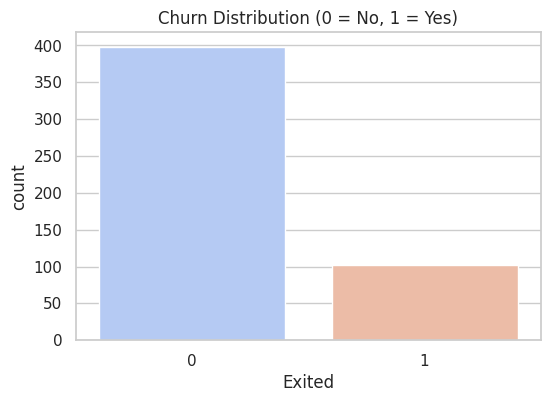

In [18]:
#1. churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df_churn_cleaned['Exited'], palette="coolwarm")
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

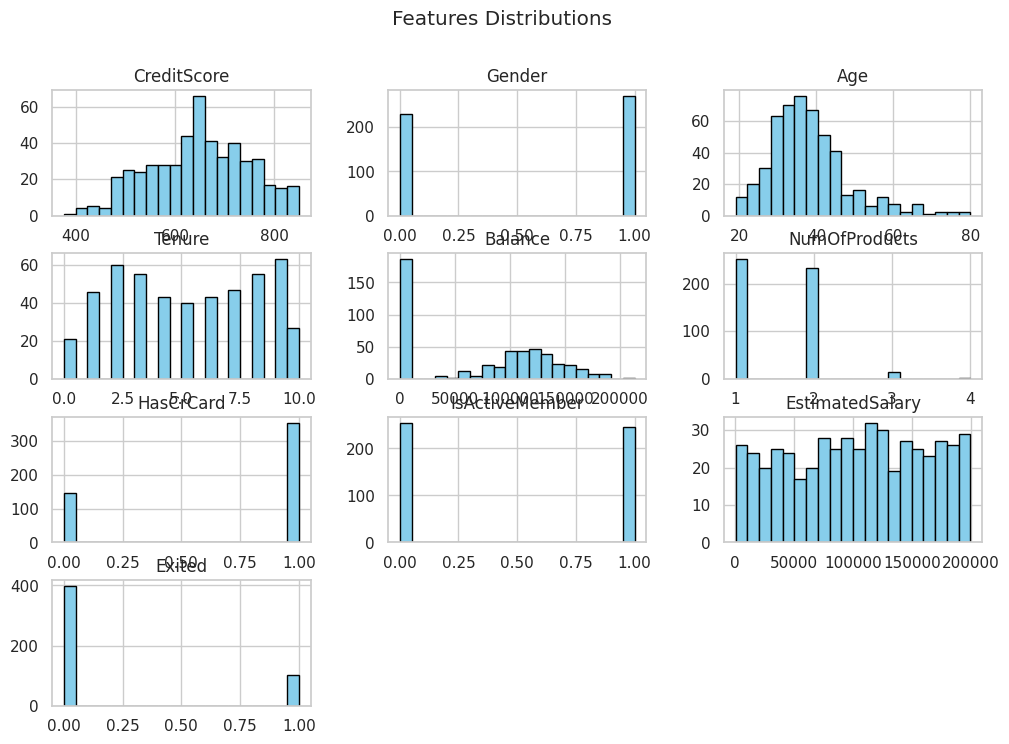

In [56]:
#2. Histograms of numerical features
df_churn_cleaned.hist(figsize=(12,8), bins=20, color='skyblue',edgecolor='black')
plt.suptitle("Features Distributions")
plt.show()

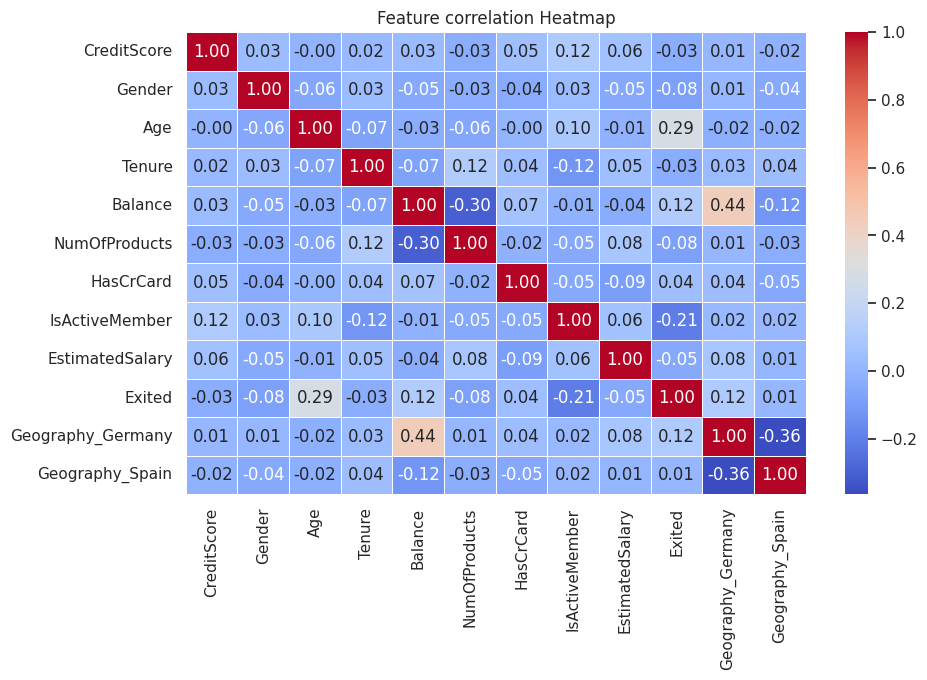

In [20]:
#3. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_churn_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature correlation Heatmap")
plt.show()

<ipython-input-21-b9efdb401f23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df_churn_cleaned, palette="coolwarm")


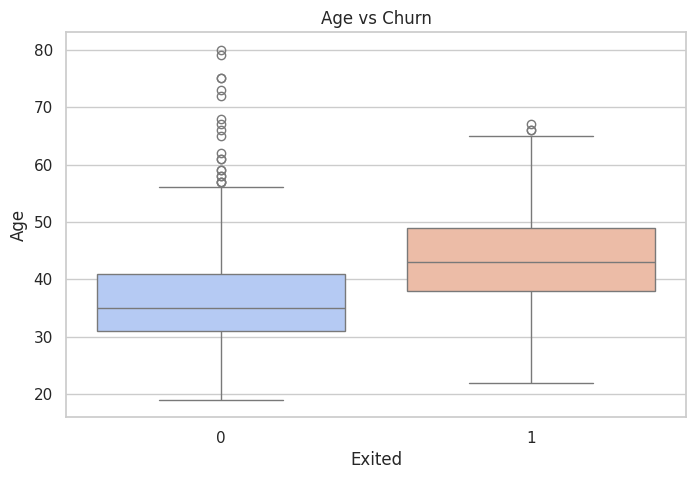

In [21]:
#4. Boxplot of Age vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Age', data=df_churn_cleaned, palette="coolwarm")
plt.title("Age vs Churn")
plt.show()

<ipython-input-22-05dba647adf2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data=df_churn_cleaned, palette="coolwarm")


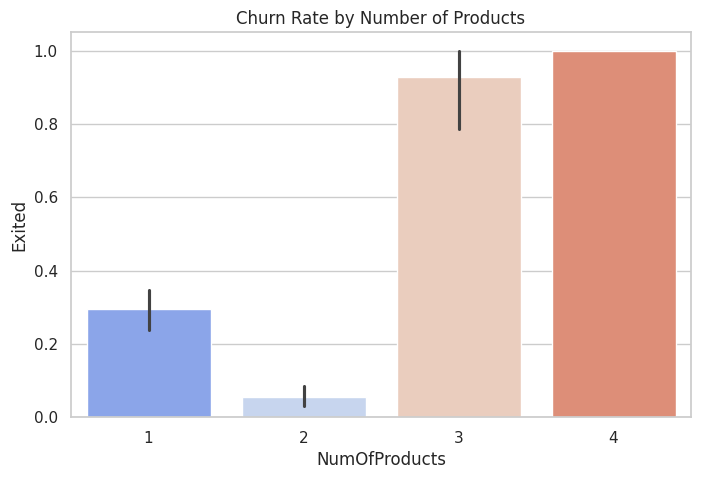

In [22]:
#5. Churn Rate by Number of Products
plt.figure(figsize=(8,5))
sns.barplot(x='NumOfProducts', y='Exited', data=df_churn_cleaned, palette="coolwarm")
plt.title("Churn Rate by Number of Products")
plt.show()

What to Observe:
1️⃣ How is the churn distributed? (Balanced or imbalanced?)
2️⃣ Which features are most correlated with churn?
3️⃣ Do older or younger customers churn more?
4️⃣ Do customers with more products churn less or more?

Step 4: Deriving Insights & Feature Selection
Now, we’ll analyze our findings and decide which features are important for predicting churn.

🔹 Key Observations from EDA:
✅ Which features show a strong correlation with churn?
✅ Are there any patterns in customer age, balance, or number of products?
✅ Are there any surprising trends?

1. Identify Key Features
From the correlation heatmap and box plots, note which features have the most impact on churn. Typically:

Age, Balance, and NumOfProducts have a strong relationship with churn.
IsActiveMember and CreditScore may also be influential.
Geography and Gender could impact churn rates.
🔹 2. Feature Selection
Drop low-impact features (if any) and keep only the most relevant ones.

In [26]:
#Selecting important features based on EDA
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender']

In [27]:
#Creating a final dataset for modeling
x = df_churn_cleaned[selected_features] #Features
y = df_churn_cleaned['Exited'] #Target variable (churn)

In [28]:
#Display the first few rows
print(x.head())
print(y.value_counts(normalize=True)) #Check churn ratio

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0   42       2       0.00              1          1   
1        608.0   41       1   83807.86              1          0   
2        502.0   42       8  159660.80              3          1   
3        650.0   39       1       0.00              2          0   
4        850.0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender  
0               1        101348.88              False            False       0  
1               1        112542.58              False             True       0  
2               0        113931.57              False            False       0  
3               0         93826.63              False            False       0  
4               1         79084.10              False             True       0  
Exited
0    0.796
1    0.204
Name: proportion, dtype: float64


Next Steps After Running the Code
1️⃣ Confirm that only the selected features remain.
2️⃣ Check the churn ratio again to confirm class imbalance.

Step 5: Train a Machine Learning Model
We'll follow these steps:

✅ 1. Split Data into Training & Testing Sets – So the model can learn and be evaluated properly.
✅ 2. Train a Machine Learning Model – Use a classifier like Logistic Regression or Random Forest.
✅ 3. Evaluate the Model – Check accuracy, precision, recall, and F1-score.
✅ 4. Tune the Model (Optional) – Improve performance with hyperparameter tuning

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
#1. Split data into train & test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [33]:
#2. Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
#3. Make predictions
y_pred = model.predict(x_test)

In [36]:
#4. Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nComnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        80
           1       0.78      0.35      0.48        20

    accuracy                           0.85       100
   macro avg       0.82      0.66      0.70       100
weighted avg       0.84      0.85      0.83       100


Comnfusion Matrix:
 [[78  2]
 [13  7]]


What to Analyze:
1️⃣ How accurate is the model?
2️⃣ Is precision and recall balanced for both churned (1) and retained (0) customers?
3️⃣ Are there too many false positives or false negatives?

Step 6: Model Optimization & Interpretation
Now, we’ll:
✅ 1. Feature Importance Analysis – Find out which features impact churn the most.
✅ 2. Hyperparameter Tuning – Improve model performance using Grid Search or Random Search.
✅ 3. Test Alternative Models – Compare Random Forest with other models (e.g., Logistic Regression, XGBoost).

1. Feature Importance Analysis
Understanding which factors drive churn helps in making data-driven decisions.
Run the following code to visualize feature importance:

In [37]:
import matplotlib.pyplot as plt

In [38]:
import seaborn as sns

In [40]:
#Get feature importance from the model
importances = model.feature_importances_
feature_names = x.columns

In [41]:
#Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-42-798cfb00aa06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")


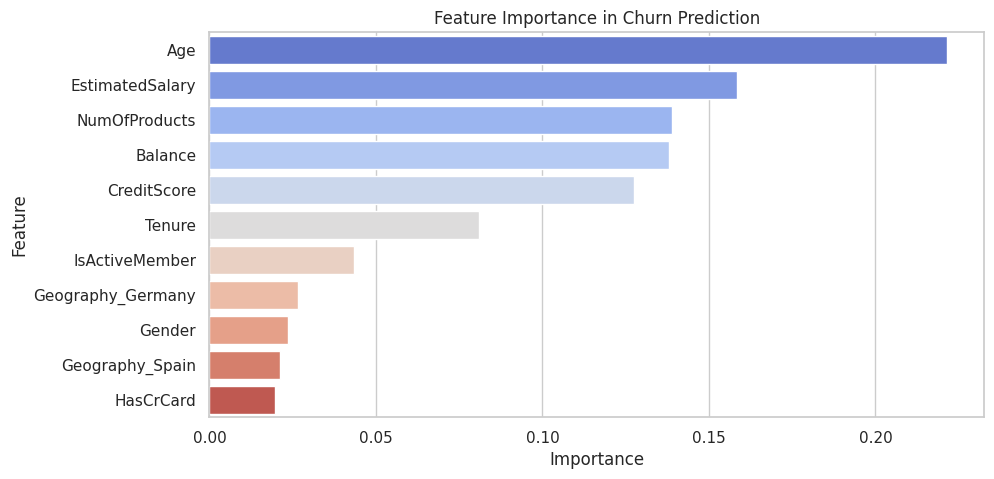

In [42]:
#Plot the feature importance
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance in Churn Prediction")
plt.show()

2. Hyperparameter Tuning
To improve model performance, we can optimize hyperparameters. Try Randomized Search CV:

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Define parameter grid
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20, None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [45]:
#Perform Ramdomized Search
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_iter=10, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [47]:
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred))

# Get predictions from the best model found by RandomizedSearchCV
y_pred_best = random_search.best_estimator_.predict(x_test)

print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Model Accuracy: 0.85

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        80
           1       0.78      0.35      0.48        20

    accuracy                           0.85       100
   macro avg       0.82      0.66      0.70       100
weighted avg       0.84      0.85      0.83       100



3. Try Alternative Models
You can also compare different models like Logistic Regression or XGBoost to see which performs best.

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
from xgboost import XGBClassifier

In [50]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.78


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.87


 Next Steps
1️⃣ Run the feature importance analysis.
2️⃣ Optimize hyperparameters for better performance.
3️⃣ Compare models to choose the best one.

<ipython-input-54-e4ddb7cc5faa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")


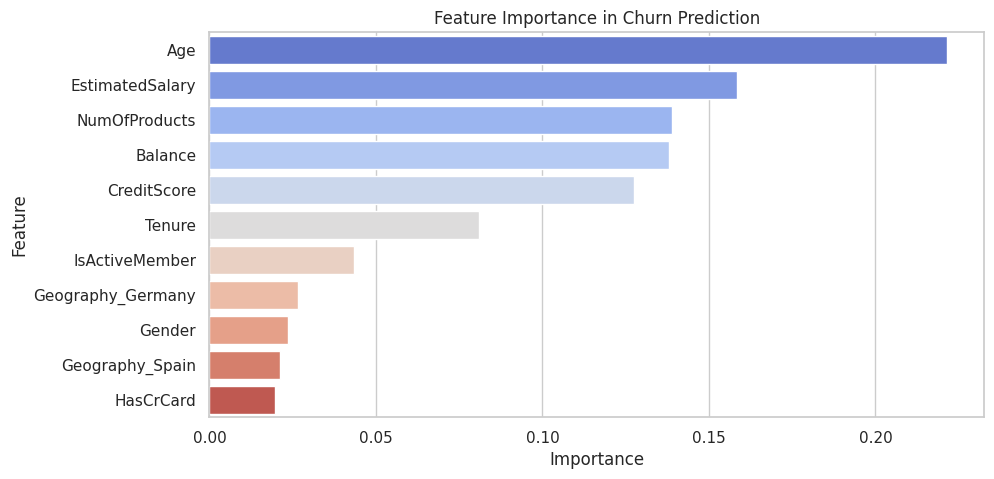

In [54]:
# Save feature importance plot
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance in Churn Prediction")
plt.savefig("feature_importance.png")  # Saves the plot as an image
plt.show()
